<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Examen_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as stm

In [ ]:
data_b=pd.read_table("bijouterie.txt",sep=",")

In [ ]:
data_b.head(5)

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_b.shape

(53940, 11)

In [ ]:
data_b=data_b.drop(columns=["ID"])

In [ ]:
data_b.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
corr=data_b.corr()

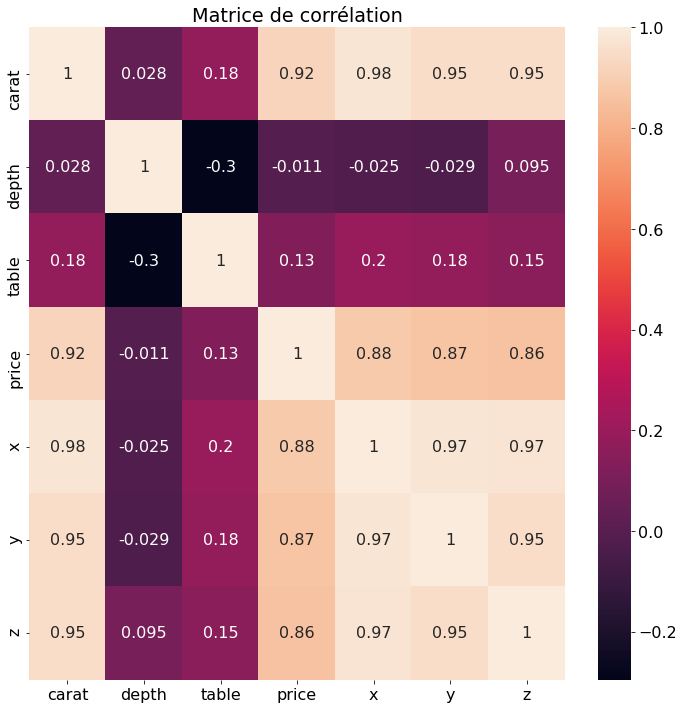

In [ ]:
plt.figure(figsize=(12,12))
plt.style.use(plt.style.available[10])
plt.rcParams.update({"font.size":16})
plt.title("Matrice de corrélation")
sns.heatmap(corr,annot=True)

*  Nous avons une forte corrélation linéaire entre les trois variables x,y,z, carat et le du prix des diamants. Ce qui est tout à fait logique car plus les dimension sont grande plus le diamant est lourd alors le prix sera élévé vis-versa mais il faut confirmer celà et confronté ces résultat à l'influence des autres variables sur l'évolution du prix du diamant.


*   Bien que faible l'augmentation des dimension  x,y,z du diamant augmente la **table** du diamant tandisque seulement depth n'est corrélé positivement qu'avec z,tout à fait logique car la profondeur est suivant **z**.

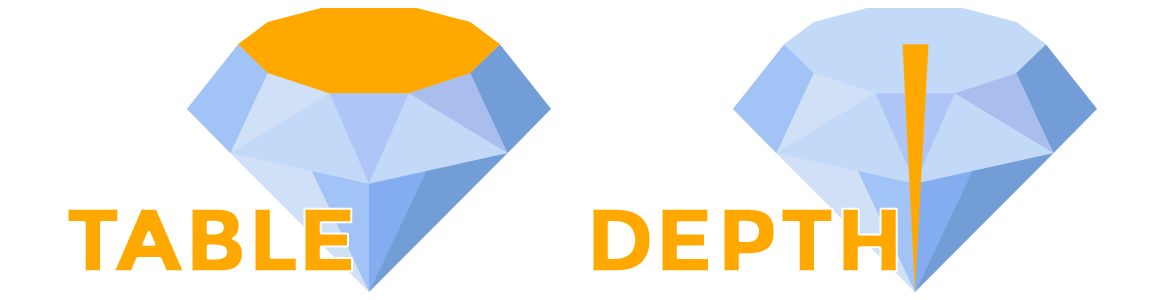

In [ ]:
plt.figure(figsize=(10,10))
stat_desc=data_b.describe().round(2)
stat_desc
#sns.heatmap(stat_desc,annot=True)
stat_desc.to_latex("stat_desc.tex")

<Figure size 720x720 with 0 Axes>

* Dans ce tableau, les statistiques décriptifs de nos variables sur 54000 observations. Bien que la devise de la money n'est pas précisé mais le prix de la diamant reste plus élévé en moyenne nous avons 3900 unité monétaire.
* D'autre part vu la statistique, nous risquerons de rencontrer des problèmes liée à la différence d'échelle entre les variables.

In [ ]:
data_b.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_b.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
tdy=pd.pivot_table(data_b,index=["cut"],aggfunc="mean")
tdy

,carat,depth,price,table,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770
Good,0.849185,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801


Cette croisement dynamiquement servira dans l'interprétation des graphes ci-dessous

Text(0.5, 1.0, 'La distribution des observations par Coupe')

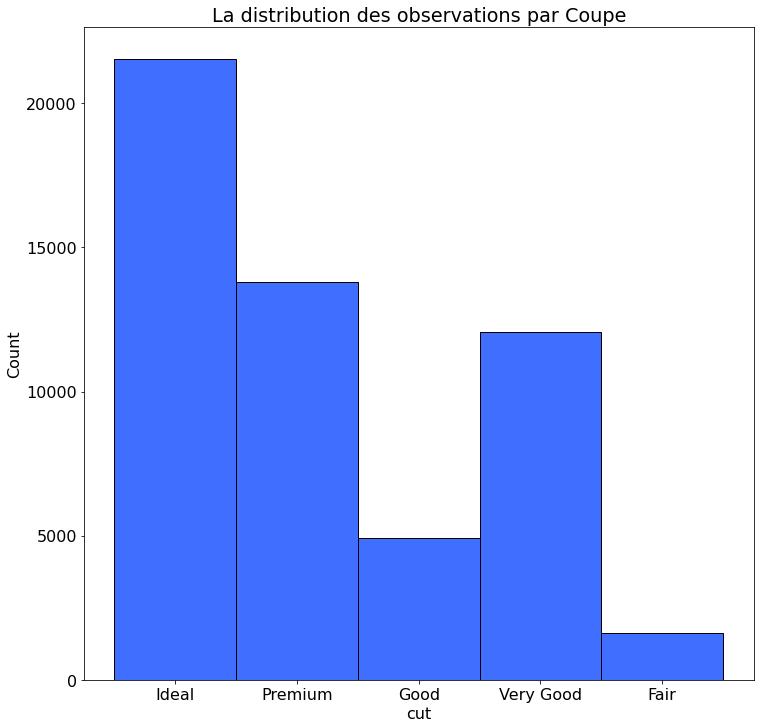

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data_b.cut,label=True)
plt.title("La distribution des observations par Coupe")
#plt.axis(ymax=22000)

Dans nos observations la majorité écrasante des coupes est de type \textbf{Ideal}, il s'en suit de \textbf{Premium} (haut gamme), le moins répresenté par rapport aux autres est le type \textbf{Fair} de nos diamants observés

(-0.5, 4.5, -598.85, 14400.0)

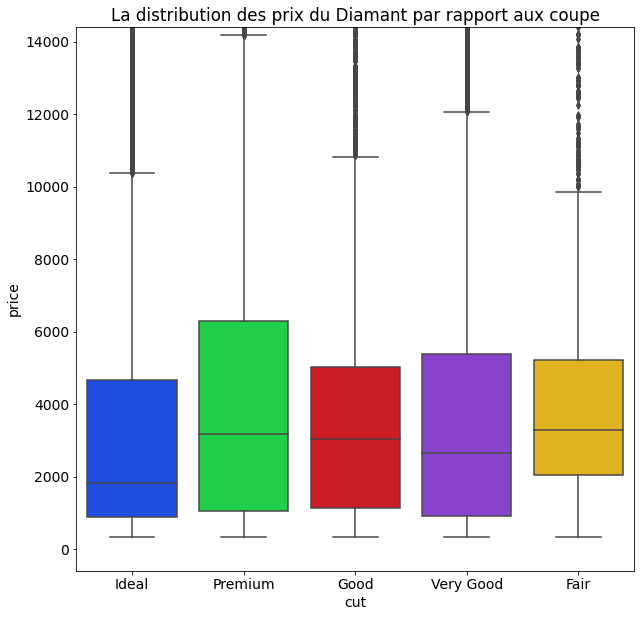

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(10,10))
sns.boxplot(x="cut",y="price",data=data_b)
plt.title("La distribution des prix du Diamant par rapport aux coupe")
plt.axis(ymax=14400)

bold text

*   En moyenne, bien que la différence est peut significative à cette échelle les diamants dont la coupe est de type **Prenium** sont plus chère, ce qui est tout a conforme à la réalité du marché le produit **haut gammme**
*   Après nous avons le coupe **Fair** qui s'impose en terme de prix en moyenne. Mais il est plus limité par rapport aux autres pour des prix exceptionnels.



Text(0.5, 1.0, 'Distribution des prix par rapport au coupe')

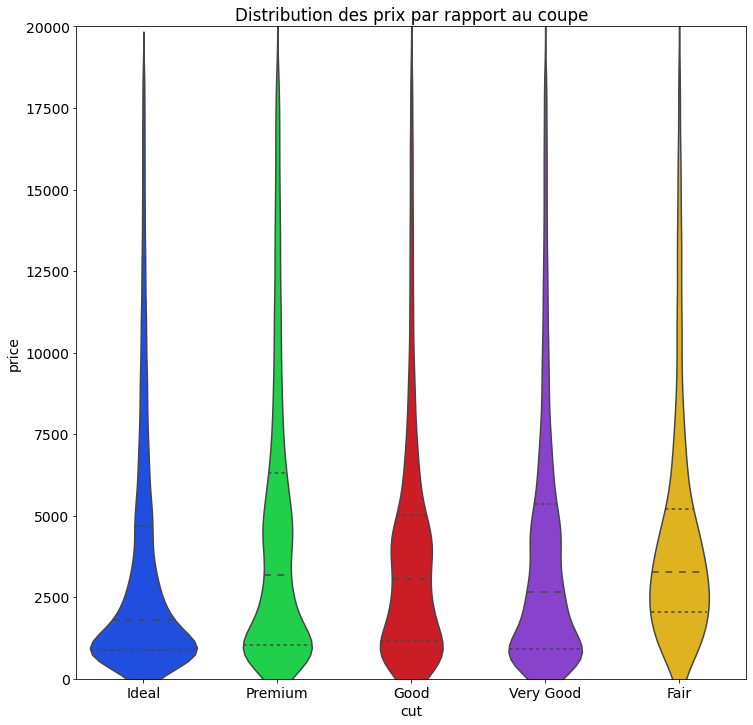

In [ ]:
plt.figure(figsize=(12,12))
sns.violinplot(x="cut",y="price",data=data_b,inner="quartile")
plt.axis(ymin=0,ymax=20000)
plt.title("Distribution des prix par rapport au coupe")

D'après ce graphe, nous avons pour toute les types de coupes, un maximun en terme de distribution ayant un prix qui tourne autour du 1 er quartile soit 950 unité monétaire

In [ ]:
tdy=pd.pivot_table(data_b,index=["color"],aggfunc="mean").sort_values(by="price")
tdy

,carat,depth,price,table,x,y,z
color,,,,,,,
E,0.657867,61.662090,3076.752475,57.491201,5.411580,5.419029,3.340689
D,0.657795,61.698125,3169.954096,57.404590,5.417051,5.421128,3.342827
F,0.736538,61.694582,3724.886397,57.433536,5.614961,5.619456,3.464446
G,0.771190,61.757111,3999.135671,57.288629,5.677543,5.680192,3.505021
H,0.911799,61.836850,4486.669196,57.517811,5.983335,5.984815,3.695965
I,1.026927,61.846385,5091.874954,57.577278,6.222826,6.222730,3.845411
J,1.162137,61.887215,5323.818020,57.812393,6.519338,6.518105,4.033251


(-0.8500000000000001, 6.85, 0.0, 11500.0)

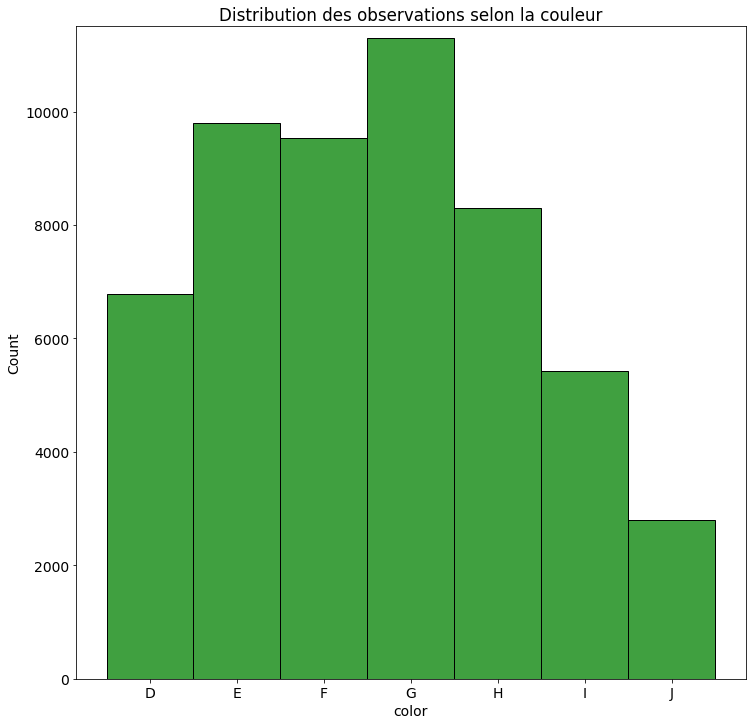

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data_b.color.sort_values(),color="green")
plt.title("Distribution des observations selon la couleur")
plt.axis(ymax=11500)



*   Le diamant de coleur G est plus répresenté dnas cette distribution et le moins répresenté est le lus qualité en valeur en terme de couleur la couleur \textbf{J} est le plus coloré dans échantillon

(-0.5, 6.5, -598.85, 16500.0)

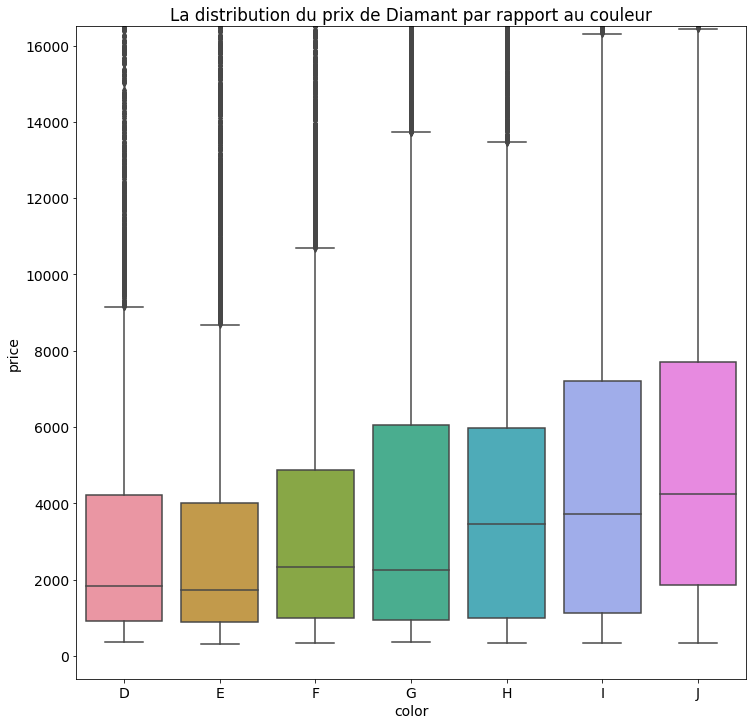

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.boxplot(x="color",y="price",data=data_b.sort_values(by="color"))
plt.title("La distribution du prix de Diamant par rapport au couleur")
plt.axis(ymax=16500)


*   Dans un prémier temps en se basant sur l'analyse bivariée seulement le prix et la couleur nous nous rencontrons la distribution présente est contracdictoire à la réalité selon le classement de **GIA (Gemological Institute of America)** où le diamant le plus chère est l'incolore de couleur **D** tandisqu'ici le couleur coloré est le plus chère en moyenne.
*   Mais en étant conscient de l'influence de la coupe et clarité nous comprenons la démarche et on illustrera ce fait un peu plus loin



(-0.9, 7.9, 0.0, 13300.0)

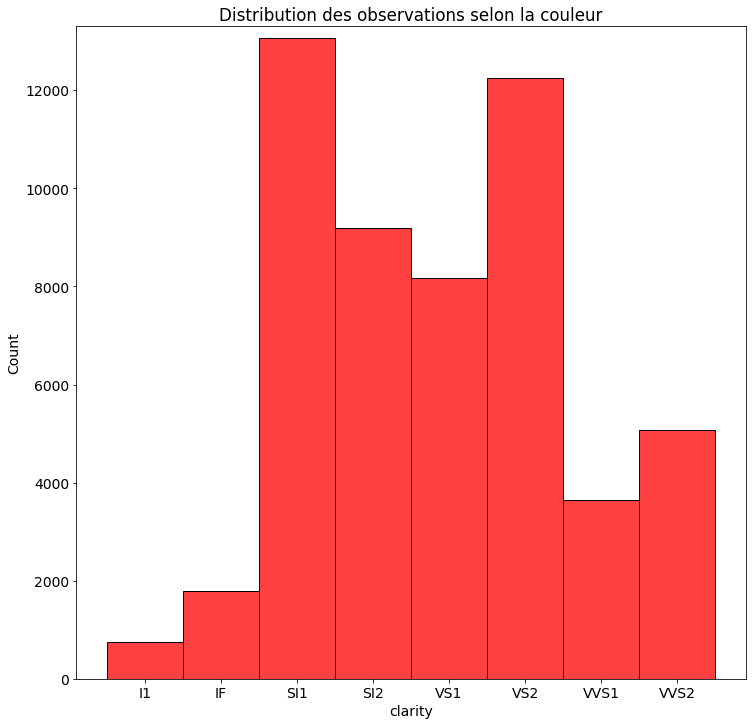

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data_b.clarity.sort_values(),color="red",)
plt.title("Distribution des observations selon la couleur")
plt.axis(ymax=13300)

# En terme de clarité **SI1** est le plus obserbé dans cette échantillon de 53940 observations

(-0.5, 7.5, -598.85, 14000.0)

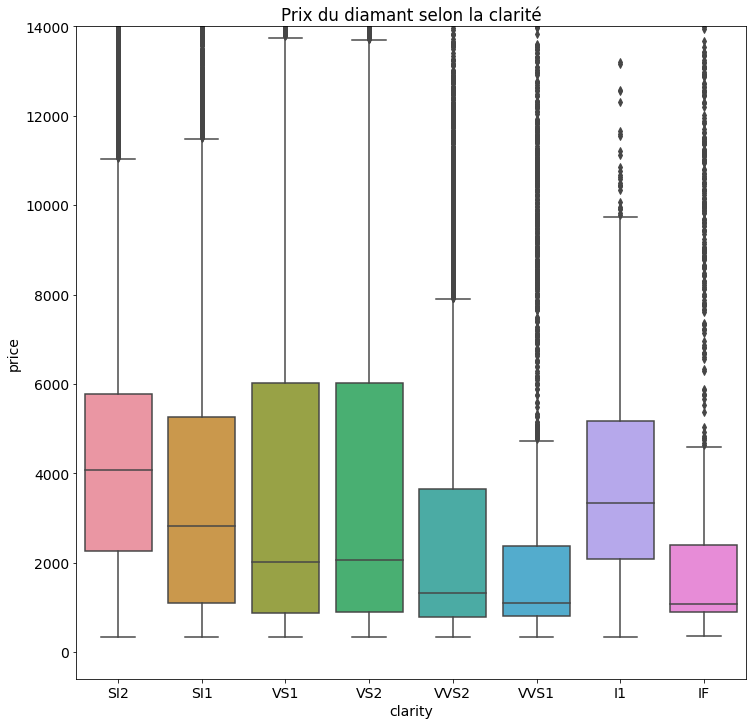

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.boxplot(x="clarity",y="price",data=data_b)
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon la clarité")
plt.axis(ymax=14000)

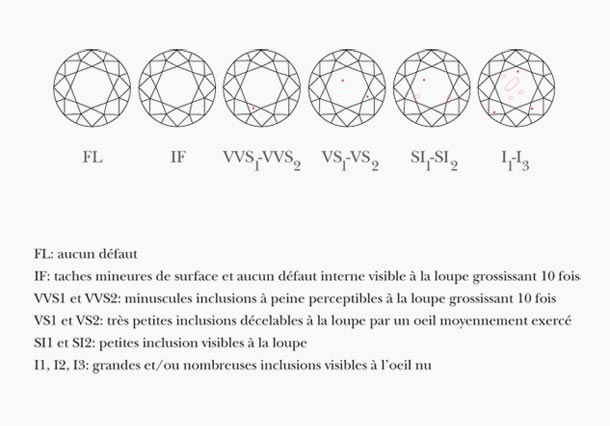

Comme dans le cas de prix-couleur, nous ne pouvons pas expliqué la variation du prix en fonction qu'une variable car on ne peut pas avoir unne cohérence avec la réalité 

Text(0.5, 1.0, 'La distribution de depth & table de diamant')

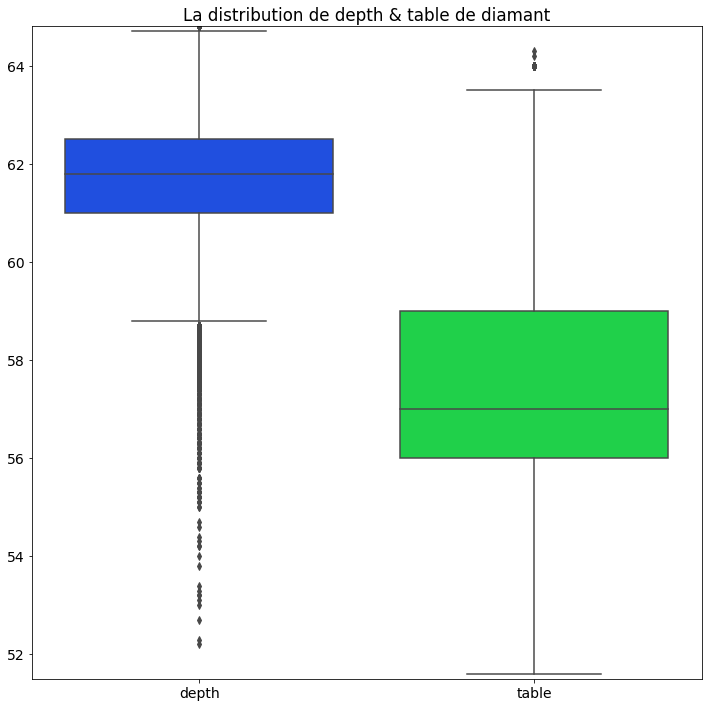

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})

plt.figure(figsize=(12,12))
sns.boxplot(data=data_b[["depth","table"]])
plt.axis(ymin=51.5,ymax=64.8)
plt.title("La distribution de depth & table de diamant")


Nous avons des diamants dont en moyenne avec plus de profondeur que de largeur, cela peut s'expliquer par exemple avec la bague qui est destiné à être inserer au trous de la bague alor très généralement il est plus profond.

Text(0.5, 1.0, 'La distibution des  dimensions de diamant')

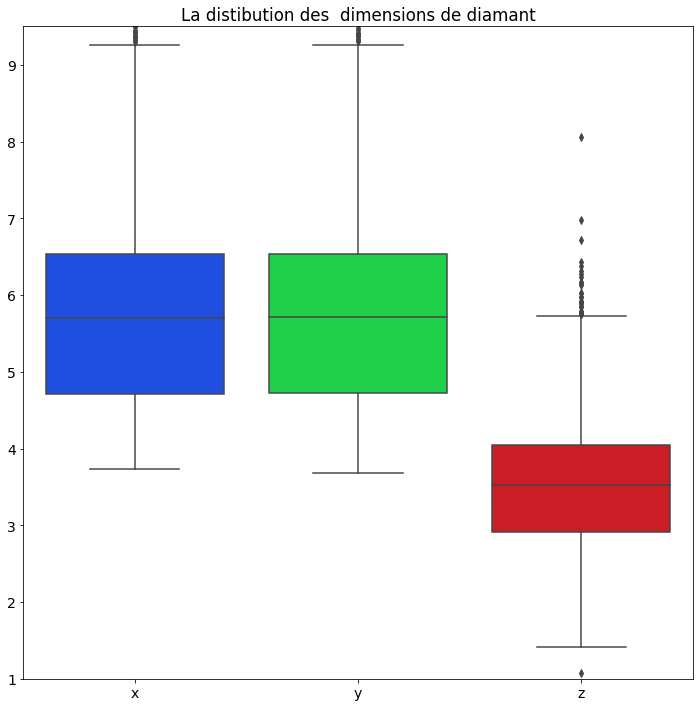

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data_b[["x","y","z"]])
plt.axis(ymin=1,ymax=9.5)
plt.title("La distibution des  dimensions de diamant")

Nous avons la même distribution de x,y. z est un peu en bas d'eux

Text(0.5, 1.0, 'La distibution des  dimensions de diamant')

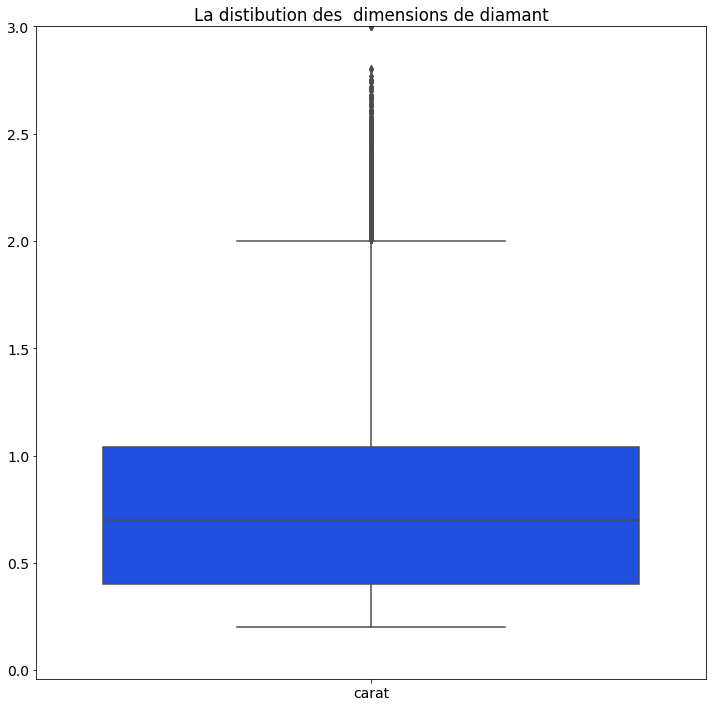

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data_b[["carat"]])
plt.axis(ymax=3)
plt.title("La distibution des  dimensions de diamant")

In [ ]:
np.std(data_b.carat)

0.47400685050992863

Text(0.5, 1.0, 'La distibution des  carat de diamant')

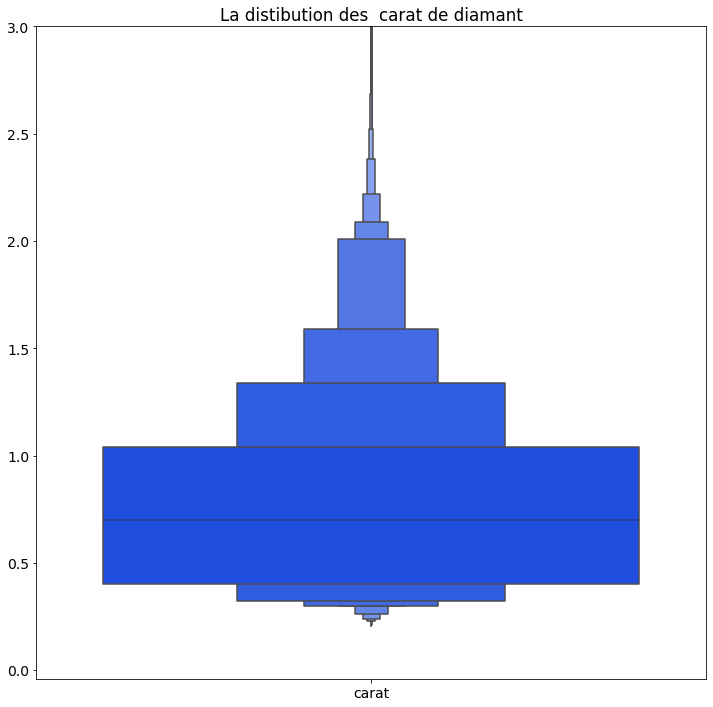

In [ ]:
plt.figure(figsize=(12,12))
sns.boxenplot(data=data_b[["carat"]])
plt.axis(ymax=3)
plt.title("La distibution des  carat de diamant")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

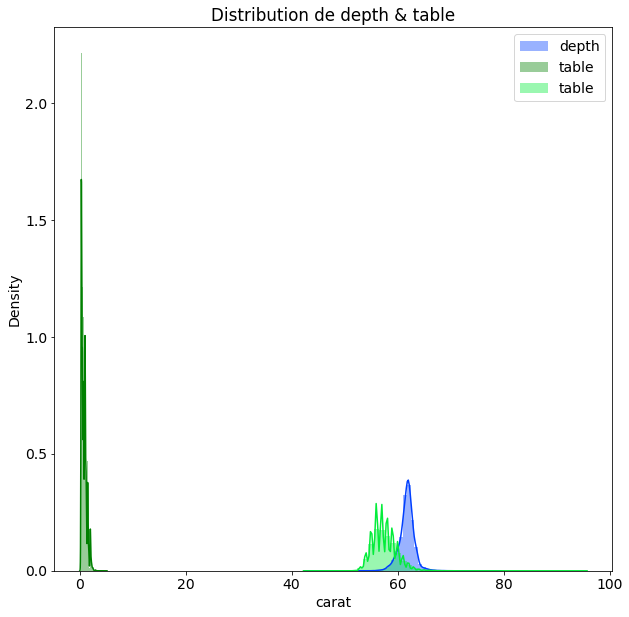

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(10,10))
sns.distplot(data_b.depth,kde=True,bins=50,label="depth",axlabel="")
sns.distplot(data_b.carat,bins=50,color="green",label="table",)
sns.distplot(data_b.table,bins=50,label="table",axlabel="",)
#plt.axis(xmin=50,xmax=70)
plt.title("Distribution de depth & table")
plt.legend()
plt.show()

(0.0, 10.74, 0.0, 21510.384883539497)

<Figure size 864x864 with 0 Axes>

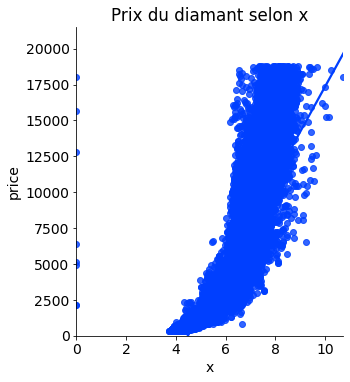

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="x",y="price",data=data_b)
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon x")
plt.axis(ymin=0)

Nous voyons que le prix augmentent avec x. présenter une rélation linéaire

(0.0, 20.0, 0.0, 25000.0)

<Figure size 864x864 with 0 Axes>

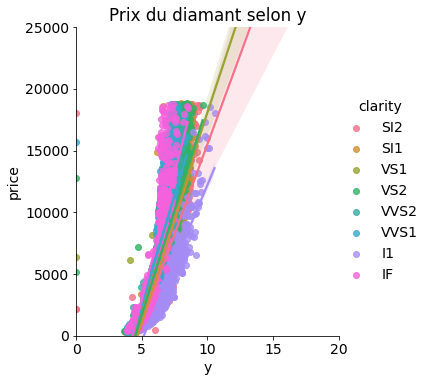

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="y",y="price",data=data_b,hue="clarity")
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon y")
plt.axis(ymin=0,ymax=25000,xmax=20)

(0.0, 7.0, 0.0, 20000.0)

<Figure size 864x864 with 0 Axes>

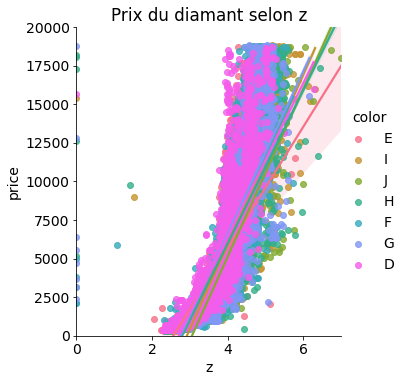

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="z",y="price",data=data_b,hue='color')
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon z")
plt.axis(ymin=0,xmax=7,ymax=20000)

(43.0, 79.0, 0.0, 19747.85)

<Figure size 864x864 with 0 Axes>

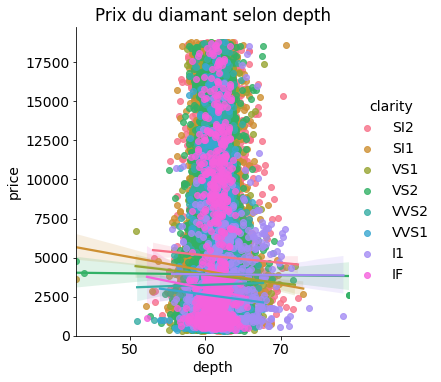

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="depth",y="price",data=data_b,hue="clarity")
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon depth")
plt.axis(ymin=0)

(43.0, 75.0, 0.0, 19747.85)

<Figure size 864x864 with 0 Axes>

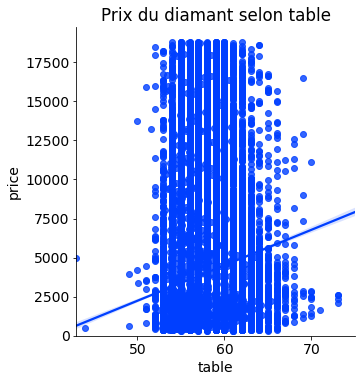

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="table",y="price",data=data_b)
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon table")
plt.axis(ymin=0,xmax=75)

(0.2, 10.0, 0.0, 20000.0)

<Figure size 864x864 with 0 Axes>

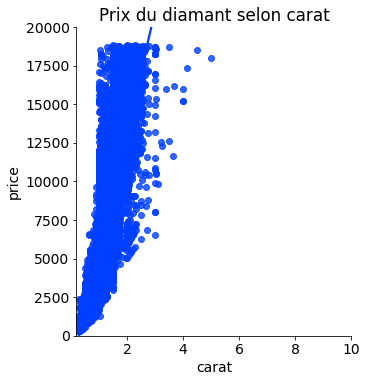

In [ ]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(12,12))
sns.lmplot(x="carat",y="price",data=data_b)
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du diamant selon carat")
plt.axis(ymin=0,ymax=20000,xmax=10)

Codage des variables catégorielles

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
col=["cut","color","clarity"]
data1=pd.DataFrame()
for colu in col:
    data1[colu]=lb.fit_transform(data_b[colu])


In [ ]:
tdy=pd.pivot_table(data_b,index=["cut"],aggfunc="mean")
tdy

,ID,carat,depth,price,table,x,y,z
cut,,,,,,,,
Fair,24147.357764,1.046137,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770
Good,24774.931309,0.849185,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
Ideal,29047.630736,0.702837,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
Premium,25600.209049,0.891955,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
Very Good,26097.313193,0.806381,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801


In [ ]:
tdy1=pd.pivot_table(data1,index=["cut"],aggfunc="mean")
tdy1

,carat,clarity,color,depth,price,table,x,y,z
cut,,,,,,,,,
0,1.046137,2.977019,2.851553,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770
1,0.849185,3.472075,2.573176,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
2,0.702837,4.074289,2.529256,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
3,0.891955,3.680226,2.697339,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
4,0.806381,3.847211,2.566545,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801


In [ ]:
tdy.index

Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object', name='cut')

In [ ]:
code=pd.DataFrame()
for c in ["color","cut","clarity"]:
  tdy1=pd.pivot_table(data1,index=[c],aggfunc="mean")
  tdy=pd.pivot_table(data_b,index=[c],aggfunc="mean")
  print("{}:{}".format(tdy.index,tdy1.index))

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object', name='color'):Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='color')
Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object', name='cut'):Int64Index([0, 1, 2, 3, 4], dtype='int64', name='cut')
Index(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], dtype='object', name='clarity'):Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='clarity')


In [ ]:
data1.head()
col1=["price","carat","x","y","z","depth","table"]
data1[col1]=data_b[col1]
data1.head()

,cut,color,clarity,price,carat,x,y,z,depth,table
0,2,1,3,326.0,0.23,3.95,3.98,2.43,61.5,55.0
1,3,1,2,326.0,0.21,3.89,3.84,2.31,59.8,61.0
2,1,1,4,327.0,0.23,4.05,4.07,2.31,56.9,65.0
3,3,5,5,334.0,0.29,4.20,4.23,2.63,62.4,58.0
4,1,6,3,335.0,0.31,4.34,4.35,2.75,63.3,58.0


In [ ]:
data_b.head(10)

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Pour la couleur :
E="1"
I=5
J=6
H=2


Suppression des valeurs abérant dee prix

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


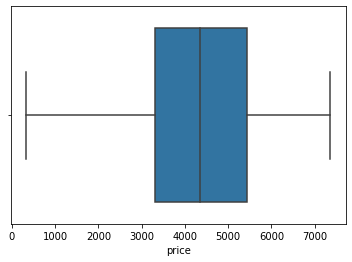

In [ ]:
data=data1
data=data[data["price"]<10000]
sns.boxplot(data.price)

Régression

In [ ]:
import statsmodels.formula.api as stats

In [ ]:
lr=stats.ols("price~carat+cut+color+clarity+depth+table+x+y+z-1",data=data)

In [ ]:
result=lr.fit()

In [ ]:
print(result)

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          7.163e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                        0.00
Time:                        22:30:11   Log-Likelihood:                     -1.4621e+05
No. Observations:               18163   AIC:                                  2.924e+05
Df Residuals:                   18154   BIC:                                  2.925e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
lr=stats.ols("price~carat+cut+color+clarity-1",data=data)
result=lr.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.259e+05
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                        0.00
Time:                        22:51:50   Log-Likelihood:                     -1.4838e+05
No. Observations:               18163   AIC:                                  2.968e+05
Df Residuals:                   18159   BIC:                                  2.968e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
lr=stats.ols("price~cut+color+clarity+depth+table+x+y-1",data=data)

In [ ]:
result=lr.fit()

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          9.833e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                        0.00
Time:                        21:51:05   Log-Likelihood:                     -4.0397e+05
No. Observations:               48717   AIC:                                  8.080e+05
Df Residuals:                   48710   BIC:                                  8.080e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
columns=["price","depth","table","x","y","z","cut","color","clarity"]

In [ ]:
anova=stats.ols("price~cut+color*clarity",data=data)

In [ ]:
re=anova.fit()

In [ ]:
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     408.7
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:51:05   Log-Likelihood:            -4.4748e+05
No. Observations:               48717   AIC:                         8.950e+05
Df Residuals:                   48712   BIC:                         8.950e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2716.2716     54.611     49.738